In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales=pd.read_csv("sales_transactions.csv")
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [37]:
# --- 1. Total revenue generated ---
total_revenue = sales["Revenue"].sum()
print(f"1. Total revenue generated: ₦{total_revenue:,}")

1. Total revenue generated: ₦29,521,000


In [7]:
# --- 2. Total transactions recorded ---
total_transactions = sales["TransactionID"].nunique()
print("2. Total transactions recorded:", total_transactions)

2. Total transactions recorded: 110


In [8]:
# --- 3. Distinct customers ---
distinct_customers = sales["CustomerID"].nunique()
print("3. Distinct customers:", distinct_customers)

3. Distinct customers: 77


In [38]:
# --- 4. Total revenue from Lagos ---
revenue_lagos = sales.loc[sales["City"].str.lower() == "lagos", "Revenue"].sum()
print(f"4. Total revenue from Lagos: ₦{revenue_lagos:,}")

4. Total revenue from Lagos: ₦9,285,500


In [13]:
# --- 5. Units of "Accessories" sold in Abuja ---
accessories_units_abuja = sales.loc[
    (sales["City"].str.lower() == "abuja") & (sales["Category"].str.lower() == "accessories"),
    "UnitsSold"
].count()
print("5. Units of Accessories sold in Abuja:", accessories_units_abuja)

5. Units of Accessories sold in Abuja: 7


In [32]:
# --- 6. Average discount offered ---
avg_discount = sales["Discount"].mean()
print(f"6. Average discount offered: ₦{avg_discount:,.2f}")

6. Average discount offered: ₦3,248.18


In [39]:
# --- 7. Revenue for February 2024 ---
sales["Date"] = pd.to_datetime(sales["Date"])
revenue_feb_2024 = sales.loc[sales["Date"].dt.strftime("%Y-%m") == "2024-02", "Revenue"].sum()
print(f"7. Revenue for February 2024: ₦{revenue_feb_2024:,}")

7. Revenue for February 2024: ₦3,855,000


In [41]:
# --- 8. Month with the highest revenue ---
monthly_revenue = sales.groupby(sales["Date"].dt.strftime("%Y-%m"))["Revenue"].sum().reset_index()
top_month_row = monthly_revenue.loc[monthly_revenue["Revenue"].idxmax()]
top_month, top_month_revenue = top_month_row["Date"], top_month_row["Revenue"]
print(f"8. Month with highest revenue: {top_month} => ₦{top_month_revenue:,}")

8. Month with highest revenue: 2024-09 => ₦4,744,500


In [40]:
# --- 9. Monthly revenue trend ---
monthly_revenue_trend = monthly_revenue.copy()
monthly_revenue_trend["Revenue"] = monthly_revenue_trend["Revenue"].map(lambda x: f"₦{x:,}")
monthly_revenue_trend

,Date,Revenue
0,2024-01,"₦2,943,000"
1,2024-02,"₦3,855,000"
2,2024-03,"₦2,184,500"
3,2024-04,"₦1,559,500"
4,2024-05,"₦2,484,500"
5,2024-06,"₦1,083,000"
6,2024-07,"₦1,340,000"
7,2024-08,"₦552,500"
8,2024-09,"₦4,744,500"
9,2024-10,"₦2,739,000"


In [42]:
# --- 10. Revenue split between New and Returning customers ---
revenue_split = sales.groupby("CustomerType")["Revenue"].sum().reset_index()
revenue_split["Revenue"] = revenue_split["Revenue"].map(lambda x: f"₦{x:,}")
revenue_split

,CustomerType,Revenue
0,New,"₦12,027,000"
1,Returning,"₦17,494,000"


In [43]:
# --- 11. Average revenue per customer ---
avg_revenue_per_customer = sales.groupby("CustomerID")["Revenue"].sum().mean()
print(f"11. Average revenue per customer: ₦{avg_revenue_per_customer:,.2f}")

11. Average revenue per customer: ₦383,389.61


In [21]:
# --- 12. Customers who bought more than once ---
customer_counts = sales["CustomerID"].value_counts()
customers_more_than_once = (customer_counts > 1).sum()
print("12. Customers who bought more than once:", customers_more_than_once)

12. Customers who bought more than once: 23


In [44]:
# --- 13. Product category that generated the most revenue ---
category_revenue = sales.groupby("Category")["Revenue"].sum().reset_index()
top_category_row = category_revenue.loc[category_revenue["Revenue"].idxmax()]
top_category, top_category_revenue = top_category_row["Category"], top_category_row["Revenue"]
print(f"13. Category with highest revenue: {top_category} => ₦{top_category_revenue:,}")

13. Category with highest revenue: Electronics => ₦19,149,000


In [45]:
# --- 14. Average revenue per unit for Electronics ---
electronics_sales = sales[sales["Category"].str.lower() == "electronics"]
avg_revenue_per_unit_electronics = electronics_sales["Revenue"].sum() / electronics_sales["UnitsSold"].sum()
print(f"14. Average revenue per unit (Electronics): ₦{avg_revenue_per_unit_electronics:,.2f}")

14. Average revenue per unit (Electronics): ₦156,959.02


In [46]:
# --- 15. Sales rep with the highest total revenue ---
salesrep_revenue = sales.groupby("SalesRep")["Revenue"].sum().reset_index()
top_salesrep_row = salesrep_revenue.loc[salesrep_revenue["Revenue"].idxmax()]
top_salesrep, top_salesrep_revenue = top_salesrep_row["SalesRep"], top_salesrep_row["Revenue"]
print(f"15. Top sales rep: {top_salesrep} => ₦{top_salesrep_revenue:,}")

15. Top sales rep: Abdul Salim => ₦10,587,500


In [27]:
# --- 16. Total units sold by each sales rep ---
salesrep_units = sales.groupby("SalesRep")["UnitsSold"].sum().reset_index()
salesrep_units

,SalesRep,UnitsSold
0,Abdul Salim,134
1,Chuka Obasi,110
2,Mary Felix,113


In [62]:
# --- 17. Revenue from Lagos only if the customer is New ---
revenue_lagos_new_customers = sales.loc[
    (sales["City"].str.lower() == "lagos") & (sales["CustomerType"].str.lower() == "new"),
    "Revenue"
].sum()
print(f"17. Revenue from Lagos (New customers only): ₦{revenue_lagos_new_customers:,}")

17. Revenue from Lagos (New customers only): ₦2,563,000


In [63]:
# --- 18. Total revenue excluding transactions from Port Harcourt ---
revenue_excl_portharcourt = sales.loc[
    sales["City"].str.lower() != "port harcourt", "Revenue"
].sum()
print(f"18. Total revenue excluding Port Harcourt: ₦{revenue_excl_portharcourt:,}")

18. Total revenue excluding Port Harcourt: ₦22,559,000


In [64]:
# --- 19. Average units sold per transaction ---
avg_units_per_transaction = sales["UnitsSold"].mean()
print(f"19. Average units sold per transaction: {avg_units_per_transaction:.2f}")

19. Average units sold per transaction: 3.25


In [60]:
# --- 20. Total discount value across all sales ---
total_discount_value = sales["Discount"].sum()
print(f"20. Total discount value: ₦{total_discount_value:,.2f}")

20. Total discount value: ₦357,300.00


In [70]:
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['YearMonth'] = sales['Date'].dt.to_period('M').astype(str)

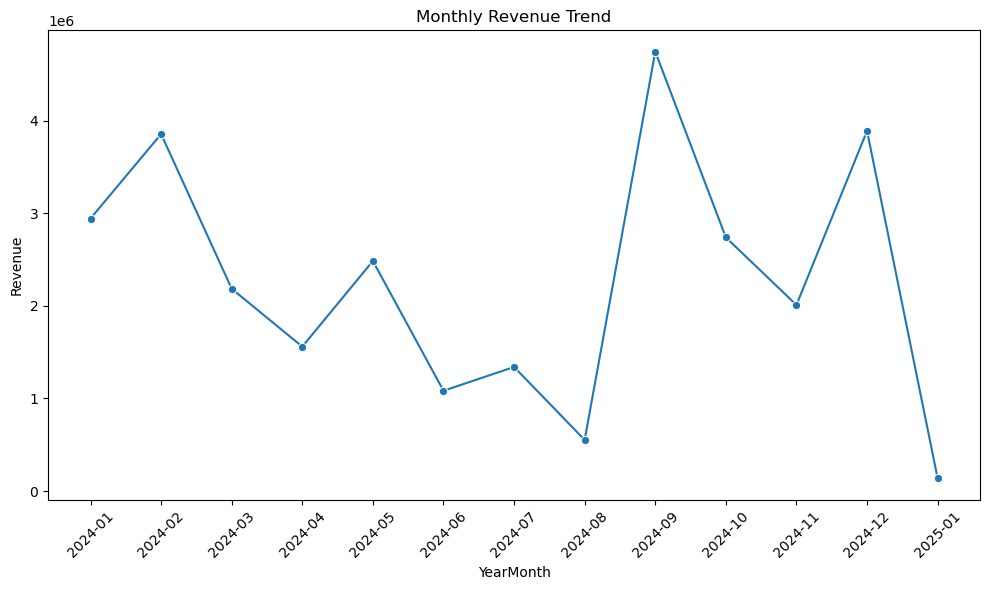

In [71]:
monthly_revenue = sales.groupby('YearMonth')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


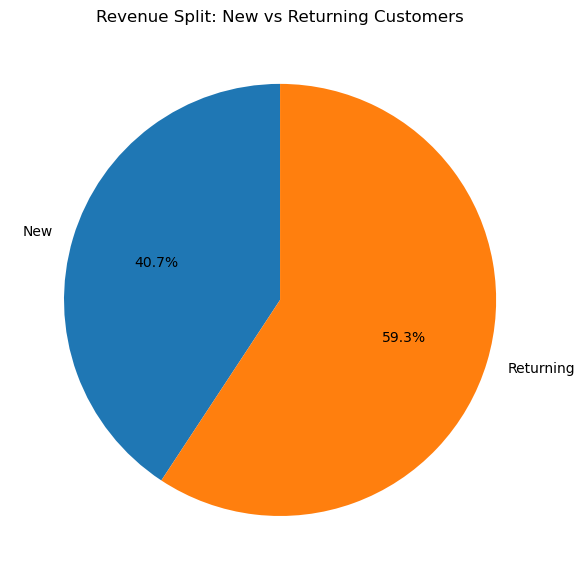

In [73]:
rev_split = sales.groupby('CustomerType')['Revenue'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(rev_split['Revenue'], labels=rev_split['CustomerType'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Split: New vs Returning Customers')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11708\2187043704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_rev, x='Category', y='Revenue', palette='viridis')


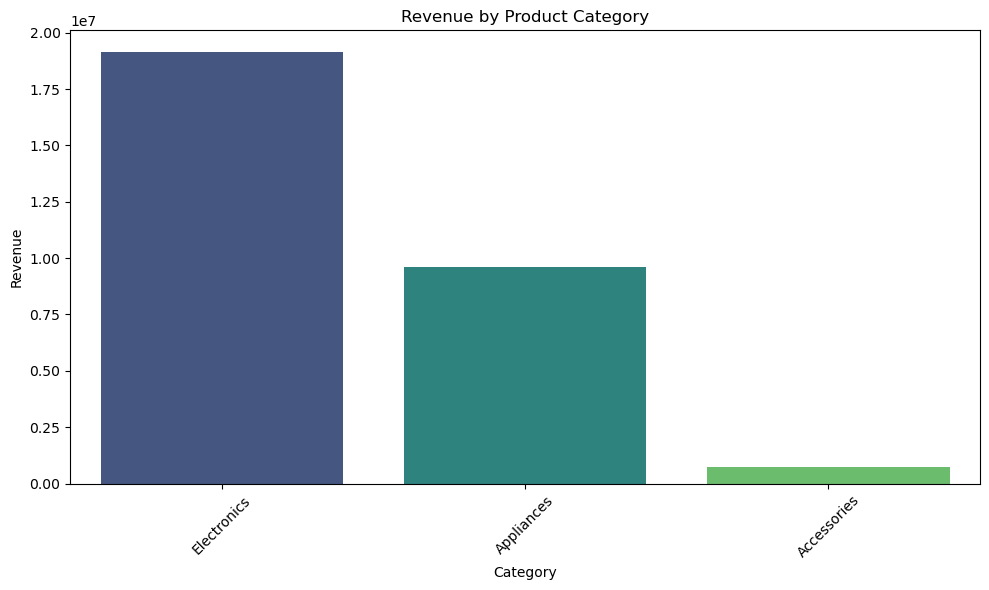

In [74]:
cat_rev = sales.groupby('Category')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=cat_rev, x='Category', y='Revenue', palette='viridis')
plt.title('Revenue by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11708\1946595059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rep_rev, x='SalesRep', y='Revenue', palette='mako')


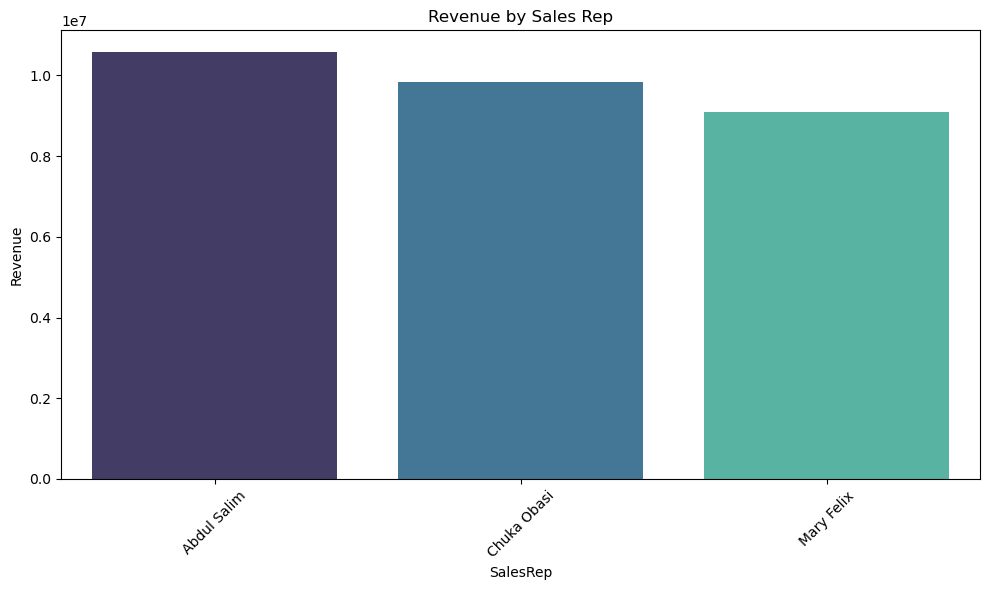

In [75]:
rep_rev = sales.groupby('SalesRep')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rep_rev, x='SalesRep', y='Revenue', palette='mako')
plt.title('Revenue by Sales Rep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11708\1445285153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rep_units, x='SalesRep', y='UnitsSold', palette='cool')


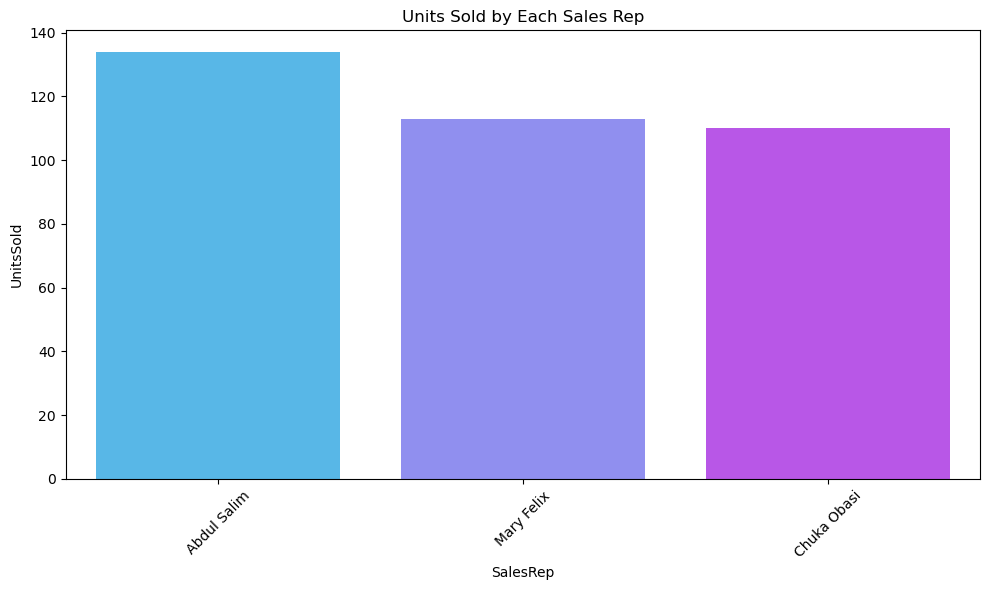

In [79]:
rep_units = sales.groupby('SalesRep')['UnitsSold'].sum().reset_index().sort_values('UnitsSold', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rep_units, x='SalesRep', y='UnitsSold', palette='cool')
plt.title('Units Sold by Each Sales Rep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

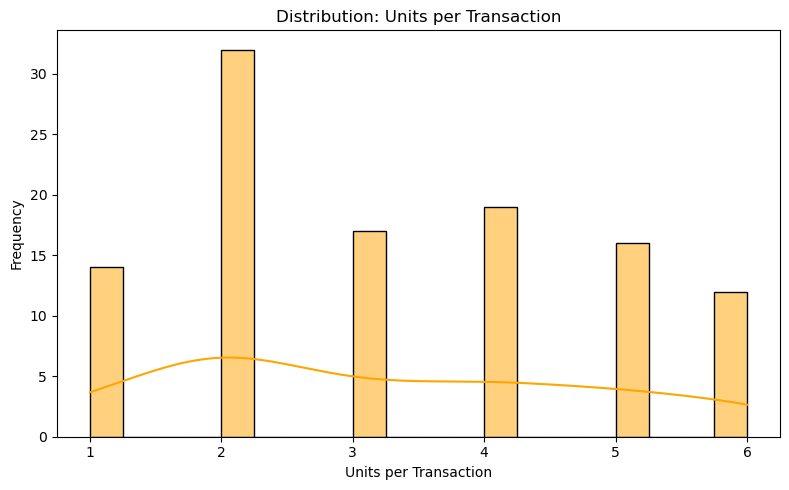

In [80]:
units_per_trans = sales.groupby('TransactionID')['UnitsSold'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(units_per_trans['UnitsSold'], bins=20, kde=True, color='orange')
plt.title('Distribution: Units per Transaction')
plt.xlabel('Units per Transaction')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [3]:
pip install dash plotly pandas


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ------------------------------

In [9]:
!pip install dash_bootstrap_components

In [4]:
# =====================================================
# NovaRetail Interactive Dashboard — Updated Visuals
# DataFrame: sales
# =====================================================

import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

# -----------------------------
# Load & Prepare Data
# -----------------------------
sales = pd.read_csv("sales_transactions.csv")

sales["Date"] = pd.to_datetime(sales["Date"])
sales["YearMonth"] = sales["Date"].dt.to_period("M").astype(str)

# -----------------------------
# Initialize Dash App
# -----------------------------
app = Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])
app.title = "NovaRetail Sales Dashboard"

# -----------------------------
# KPI Card Helper
# -----------------------------
def kpi_card(title, value_id, color):
    return dbc.Card(
        dbc.CardBody([
            html.H5(title, className="card-title text-muted"),
            html.H2(id=value_id, className="card-text", style={"color": color, "fontWeight": "bold"})
        ]),
        className="shadow-sm text-center p-3"
    )

# -----------------------------
# App Layout
# -----------------------------
app.layout = dbc.Container([
    html.Br(),
    html.H2("NovaRetail Sales Dashboard", className="text-center mb-4 fw-bold"),

    dbc.Row([
        dbc.Col([
            html.Label("Select City:", className="fw-bold"),
            dcc.Dropdown(
                options=[{"label": city, "value": city} for city in sorted(sales["City"].unique())],
                id="city_filter",
                placeholder="All Cities",
                clearable=True
            )
        ], md=4),

        dbc.Col([
            html.Label("Select Date Range:", className="fw-bold"),
            dcc.DatePickerRange(
                id="date_filter",
                start_date=sales["Date"].min(),
                end_date=sales["Date"].max(),
                display_format="YYYY-MM-DD"
            )
        ], md=6)
    ], justify="center", className="mb-4"),

    dbc.Row([
        dbc.Col(kpi_card("💰 Total Revenue", "total_revenue_kpi", "#28a745"), md=4),
        dbc.Col(kpi_card("🧾 Total Transactions", "total_transactions_kpi", "#ff8800"), md=4),
        dbc.Col(kpi_card("👥 Distinct Customers", "distinct_customers_kpi", "#007bff"), md=4),
    ], className="mb-4 g-3"),

    dbc.Row([
        dbc.Col(dcc.Graph(id="monthly_revenue_chart"), md=6),
        dbc.Col(dcc.Graph(id="customer_split_chart"), md=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="category_revenue_chart"), md=6),
        dbc.Col(dcc.Graph(id="rep_revenue_chart"), md=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="rep_units_chart"), md=6),
        dbc.Col(dcc.Graph(id="units_dist_chart"), md=6)
    ]),
    html.Br()
], fluid=True)

# -----------------------------
# Callback Logic
# -----------------------------
@app.callback(
    [
        Output("total_revenue_kpi", "children"),
        Output("total_transactions_kpi", "children"),
        Output("distinct_customers_kpi", "children"),
        Output("monthly_revenue_chart", "figure"),
        Output("customer_split_chart", "figure"),
        Output("category_revenue_chart", "figure"),
        Output("rep_revenue_chart", "figure"),
        Output("rep_units_chart", "figure"),
        Output("units_dist_chart", "figure")
    ],
    [
        Input("city_filter", "value"),
        Input("date_filter", "start_date"),
        Input("date_filter", "end_date")
    ]
)
def update_dashboard(selected_city, start_date, end_date):
    # Filter dataset by city & date range
    filtered_sales = sales.copy()
    if selected_city:
        filtered_sales = filtered_sales[filtered_sales["City"] == selected_city]
    if start_date and end_date:
        filtered_sales = filtered_sales[
            (filtered_sales["Date"] >= start_date) & (filtered_sales["Date"] <= end_date)
        ]

    # ---- KPIs ----
    total_revenue = filtered_sales["Revenue"].sum()
    total_transactions = filtered_sales["TransactionID"].nunique()
    distinct_customers = filtered_sales["CustomerID"].nunique()

    kpi1 = f"₦{total_revenue:,.0f}"
    kpi2 = f"{total_transactions:,}"
    kpi3 = f"{distinct_customers:,}"

    # ---- Monthly Revenue Trend ----
    monthly_revenue = filtered_sales.groupby("YearMonth")["Revenue"].sum().reset_index()
    fig_monthly = px.line(
        monthly_revenue, x="YearMonth", y="Revenue", markers=True,
        title="📈 Monthly Revenue Trend", template="plotly_white"
    )

    # ---- Revenue Split: New vs Returning ----
    rev_split = filtered_sales.groupby("CustomerType")["Revenue"].sum().reset_index()
    fig_split = px.pie(
        rev_split, names="CustomerType", values="Revenue",
        title="🧩 Revenue Split: New vs Returning Customers",
        color_discrete_sequence=px.colors.qualitative.Vivid
    )

    # ---- Revenue by Product Category ----
    cat_rev = filtered_sales.groupby("Category")["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False)
    fig_cat = px.bar(
        cat_rev, x="Category", y="Revenue",
        title="🏷️ Revenue by Product Category",
        color="Revenue", color_continuous_scale="Viridis"
    )

    # ---- Revenue by Sales Rep ----
    rep_rev = filtered_sales.groupby("SalesRep")["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False)
    fig_rep = px.bar(
        rep_rev, x="SalesRep", y="Revenue",
        title="👔 Revenue by Sales Representative",
        color="Revenue", color_continuous_scale="Blues"
    )

    # ---- Units Sold by Each Sales Rep ----
    rep_units = filtered_sales.groupby("SalesRep")["UnitsSold"].sum().reset_index().sort_values("UnitsSold", ascending=False)
    fig_units = px.bar(
        rep_units, x="SalesRep", y="UnitsSold",
        title="📦 Units Sold by Sales Representative",
        color="UnitsSold", color_continuous_scale="Tealgrn"
    )

    # ---- Distribution of Units per Transaction ----
    units_per_trans = filtered_sales.groupby("TransactionID")["UnitsSold"].sum().reset_index()
    fig_dist = px.histogram(
        units_per_trans, x="UnitsSold", nbins=20,
        title="📊 Distribution: Units Sold per Transaction",
        color_discrete_sequence=["orange"]
    )

    return (
        kpi1, kpi2, kpi3,
        fig_monthly, fig_split, fig_cat, fig_rep, fig_units, fig_dist
    )

# -----------------------------
# Run App
# -----------------------------
if __name__ == "__main__":
    app.run(debug=True, port=8050)


In [6]:
!pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   -------------------------------

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Example visuals
fig_monthly = px.line(
    sales.groupby('YearMonth')['Revenue'].sum().reset_index(),
    x='YearMonth', y='Revenue',
    title='Monthly Revenue Trend'
)

fig_customer = px.pie(
    sales, names='CustomerType', values='Revenue',
    title='Revenue Split: New vs Returning Customers'
)

fig_category = px.bar(
    sales.groupby('Category')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False),
    x='Category', y='Revenue', title='Revenue by Product Category'
)

fig_rep = px.bar(
    sales.groupby('SalesRep')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False),
    x='SalesRep', y='Revenue', title='Revenue by Sales Representative'
)

fig_city = px.bar(
    sales.groupby('City')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False),
    x='City', y='Revenue', title='Revenue by City'
)

# --- Export to single interactive HTML dashboard ---
with open("nova_dashboard.html", "w") as f:
    f.write(fig_monthly.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig_customer.to_html(full_html=False, include_plotlyjs=False))
    f.write(fig_category.to_html(full_html=False, include_plotlyjs=False))
    f.write(fig_rep.to_html(full_html=False, include_plotlyjs=False))
    f.write(fig_city.to_html(full_html=False, include_plotlyjs=False))

print("✅ Dashboard exported successfully: nova_dashboard.html")


✅ Dashboard exported successfully: nova_dashboard.html


In [10]:
from selenium import webdriver
import time

driver = webdriver.Chrome()
driver.get("file:///path/to/nova_dashboard.html")
time.sleep(2)
driver.save_screenshot("nova_dashboard.png")
driver.quit()


In [19]:
# =====================================================
# Full Dashboard Screenshot Export — NovaRetail Dashboard
# =====================================================

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
import threading

# -----------------------------
# Start Dash App in Background
# -----------------------------
# (Assuming you already defined the app variable earlier)
threading.Thread(target=lambda: app.run(debug=False, port=8050), daemon=True).start()

# Wait for the dashboard to fully render
time.sleep(6)

# -----------------------------
# Screenshot Configuration
# -----------------------------
chrome_options = Options()
chrome_options.add_argument("--headless=new")  # Run without opening a visible browser
chrome_options.add_argument("--window-size=1920,3000")

# Launch headless Chrome
driver = webdriver.Chrome(options=chrome_options)

# Open your local Dash app
driver.get("http://127.0.0.1:8050")

# Wait a few seconds to ensure charts render completely
time.sleep(5)

# -----------------------------
# Save Screenshot to Laptop Storage
# -----------------------------
save_path = r"C:\Users\Lenovo\Documents\nova_dashboard_full.png"
driver.save_screenshot(save_path)
driver.quit()

print(f"✅ Dashboard screenshot saved to: {save_path}")


✅ Dashboard screenshot saved to: C:\Users\Lenovo\Documents\nova_dashboard_full.png


In [21]:
# =====================================================
# NovaRetail Dashboard Screenshot (PowerPoint-Ready)
# =====================================================

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
import threading

# --- Start Dash App in Background (non-blocking) ---
threading.Thread(target=lambda: app.run(debug=False, port=8050), daemon=True).start()

# Wait for dashboard to fully load
time.sleep(6)

# --- Configure Chrome for High-Resolution Screenshot ---
chrome_options = Options()
chrome_options.add_argument("--headless=new")  # headless mode
chrome_options.add_argument("--hide-scrollbars")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--force-device-scale-factor=2")  # double DPI for sharpness

# 💡 Set 16:9 aspect ratio at 2560x1440 for PowerPoint
chrome_options.add_argument("--window-size=2560,1440")

# Launch browser
driver = webdriver.Chrome(options=chrome_options)

# Load your local dashboard
driver.get("http://127.0.0.1:8050")

# Give time for charts to render fully
time.sleep(6)

# --- Save Screenshot ---
save_path = r"C:\Users\Lenovo\Documents\nova_dashboard_ppt_ready.png"
driver.save_screenshot(save_path)
driver.quit()

print(f"✅ PowerPoint-ready dashboard image saved to: {save_path}")


ReadTimeoutError: HTTPConnectionPool(host='localhost', port=9264): Read timed out. (read timeout=120)